<a href="https://colab.research.google.com/github/FidanElizz/Bacsort/blob/master/AML_Fidan_Gurbanova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   # Machine Learning (Basic), Fidan Gurbanova, Bioinformatics Master's course, University of Bologna

                 # Description of the American Sign-Language MNIST Problem 

American Sign Language (ASL) is a complete, natural language that has the same linguistic properties as spoken languages, with grammar that differs from English. ASL is expressed by movements of the hands and face. It is the primary language of many North Americans who are deaf and hard of hearing, and is used by many hearing people as well. The dataset format is patterned to match closely with the classic MNIST. Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z (and no cases for 9=J or 25=Z because of gesture motions). The training data (27,455 cases) and test data (7172 cases) are approximately half the size of the standard MNIST but otherwise similar with a header row of label, pixel1,pixel2….pixel784 which represent a single 28x28 pixel image with grayscale values between 0-255. ![Screenshot%202022-01-13%20at%2017.35.50.png](attachment:Screenshot%202022-01-13%20at%2017.35.50.png)

# SUPPORT VECTOR MACHINE vs K-NEAREST-NEIGHBOUR


In this notebook, my goal is to compare three different algorithms, which are (Support Vector Machine)SVM one vs rest algorithm, (K-Nearest_Neighbour)KNN and (Convolutional Neural networks)CNN. These types of projects, the ones are related to image recognition, usually can easily be solved with deep learning algorithms such as convolutional neural networks, but I wanted to use these two algorithms besides CNN, because they can be also be efficient sometimes in these problems and require less computations, as you would not expect from CNN or neural networks in general. The dataset has 27455 training samples with pixel intensity of 28 x 28 handsign images for 24 different classes (different handsign per class) and 7172 testing samples.

        # Loading Dataset and libraries

In [ ]:
# Python 3 environment comes with many helpful analytics libraries installed within

import numpy as np
import pandas as pd

In [ ]:
import os
for dirname, _, filenames in os.walk('/Users/fidanqurbanova/Downloads/archive/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/fidanqurbanova/Downloads/archive/AML_Fidan_Gurbanova.html
/Users/fidanqurbanova/Downloads/archive/AML_Fidan_Gurbanova.ipynb
/Users/fidanqurbanova/Downloads/archive/american_sign_language.PNG
/Users/fidanqurbanova/Downloads/archive/sign_mnist_test.csv
/Users/fidanqurbanova/Downloads/archive/AML_basic_FG.ipynb
/Users/fidanqurbanova/Downloads/archive/archive.zip
/Users/fidanqurbanova/Downloads/archive/sign_mnist_train.csv
/Users/fidanqurbanova/Downloads/archive/amer_sign3.png
/Users/fidanqurbanova/Downloads/archive/amer_sign2.png
/Users/fidanqurbanova/Downloads/archive/sign_mnist_train/sign_mnist_train.csv
/Users/fidanqurbanova/Downloads/archive/.ipynb_checkpoints/AML_Fidan_Gurbanova-checkpoint.ipynb
/Users/fidanqurbanova/Downloads/archive/.ipynb_checkpoints/AML_basic_FG-checkpoint.ipynb
/Users/fidanqurbanova/Downloads/archive/sign_mnist_test/sign_mnist_test.csv


In [ ]:
train = pd.read_csv("/Users/fidanqurbanova/Downloads/archive/sign_mnist_train.csv")
test  = pd.read_csv("/Users/fidanqurbanova/Downloads/archive/sign_mnist_test.csv")

In [ ]:
test.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
5,21,72,79,87,101,115,124,131,135,139,...,187,189,192,193,194,194,194,195,195,194
6,10,93,100,112,118,123,127,131,133,136,...,173,175,177,178,180,180,181,181,181,183
7,14,177,177,177,177,177,178,179,179,178,...,232,223,224,224,223,221,221,221,220,219
8,3,191,194,196,198,201,203,204,205,205,...,43,57,78,64,47,62,65,62,62,68
9,7,171,172,172,173,173,173,173,173,172,...,199,199,198,196,195,194,183,85,65,124


                            # SUPPORT VECTOR MACHINE OvR

First I start with Support Vector Machine algorithm, and since this is a multiclass problem, I chose one vs rest decision function. So, firstly I use all the training data to estimate the parameters for our SVM model and afterwards validate it with the test dataset. The more data we use the more accurate our model will become. In this case, our classifier manages to predict the test images with 84% accuracy.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

df = pd.read_csv('/Users/fidanqurbanova/Downloads/archive/sign_mnist_train.csv')
df_test = pd.read_csv('/Users/fidanqurbanova/Downloads/archive/sign_mnist_test.csv')

x_train = df.iloc[0:27455, 1:785].values
y_train = df.iloc[0:27455, 0].values

x_test = df_test.iloc[0:7172, 1:785].values
y_test = df_test.iloc[0:7172,0].values

label_enc = LabelEncoder()
y_train = label_enc.fit_transform(y_train)
y_test = label_enc.fit_transform(y_test)

from sklearn.svm import SVC

classifier = SVC(decision_function_shape='ovr')

classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred,average='micro')
cm = confusion_matrix(y_test,y_pred)

print(cm)
print(f1)
print(acc)

[[331   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 426   0   0   0   0   0   0   0   6   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0 308   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 244   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   1   0]
 [  0   0   0   0 495   0   0   0   0   0   0   0   0   0   0   0   0   3
    0   0   0   0   0   0]
 [  0   0  20   0   0 206   0   0   0   0  21   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0 322   7   0   0   0   0   0   0   0   0   0   0
   19   0   0   0   0   0]
 [  0   0   0   0   0   0  20 412   0   0   0   0   0   0   0   0   0   0
    1   3   0   0   0   0]
 [  0   0   0   0   0   0   0   0 260   0   0   3   0   0   0   0   0   0
    2   0   0   0   0  23]
 [  0   0   0   0   0   0   0   0  21 194   0   0   0   0   0   0  47   0
    0  26   0  23

                       # K-NEAREST-NEIGHBOUR

Next step is to run KNN, the method considered as an instance based learning or lazy learning. Therefore it does not require as much time as other classification methods to be fitted and to predict. In this case, our KNN classifier has approximately a 60% accuracy. As for the k number of neighbours I chose 165, because that is the closest odd number to the squareroot of the training dataset size.

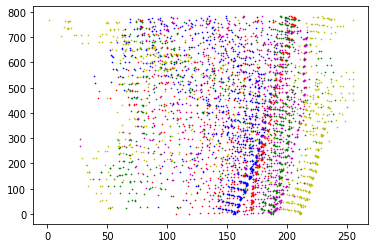

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

df = pd.read_csv('/Users/fidanqurbanova/Downloads/archive/sign_mnist_train.csv')
df_test = pd.read_csv('/Users/fidanqurbanova/Downloads/archive/sign_mnist_test.csv')

x_train = df.iloc[0:27455, 1:785].values
y_train = df.iloc[0:27455, 0].values

pixel_number = np.arange(0,784,1)

x_test = df_test.iloc[0:7172, 1:785].values
y_test = df_test.iloc[0:7172,0].values

plt.scatter(x_train[0],pixel_number, s=0.4, c = 'r')
plt.scatter(x_train[1],pixel_number, s=0.4, c = 'b')
plt.scatter(x_train[2],pixel_number, s=0.4, c = 'g')
plt.scatter(x_train[3],pixel_number, s=0.4, c = 'y')
plt.scatter(x_train[4],pixel_number, s=0.4, c = 'm')
plt.show()

label_enc = LabelEncoder()
y_train = label_enc.fit_transform(y_train)
y_test = label_enc.fit_transform(y_test)

from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=165)
classifier = KNN.fit(x_train,y_train)

y_pred = classifier.predict(x_test)
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred,average='micro')
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f1)
print(acc)

# Convolutional Neural Network

A Convolutional Neural Network is a special type of an Artificial Intelligence implementation which uses a special mathematical matrix manipulation called the convolution operation to process data from the images.

A convolution does this by multiplying two matrices and yielding a third, smaller matrix.
The Network takes an input image, and uses a filter (or kernel) to create a feature map describing the image.
In the convolution operation, we take a filter (usually 2x2 or 3x3 matrix ) and slide it over the image matrix. The coresponding numbers in both matrices are multiplied and and added to yield a single number describing that input space. This process is repeated all over the image.This working can be seen in the following figure![Screenshot%202022-01-13%20at%2021.09.17.png](attachment:Screenshot%202022-01-13%20at%2021.09.17.png)

               # Loading dataset and Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from keras.optimizers import adam_v2
opt = adam_v2.Adam

In [ ]:
import numpy as np
from __future__ import absolute_import
from tensorflow.keras import layers
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import rmsprop_v2
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [ ]:
import os
for dirname, _, filenames in os.walk('/Users/fidanqurbanova/Downloads/archive/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/fidanqurbanova/Downloads/archive/american_sign_language.PNG
/Users/fidanqurbanova/Downloads/archive/sign_mnist_test.csv
/Users/fidanqurbanova/Downloads/archive/sign_mnist_train.csv
/Users/fidanqurbanova/Downloads/archive/amer_sign3.png
/Users/fidanqurbanova/Downloads/archive/amer_sign2.png
/Users/fidanqurbanova/Downloads/archive/sign_mnist_train/sign_mnist_train.csv
/Users/fidanqurbanova/Downloads/archive/sign_mnist_test/sign_mnist_test.csv


In [ ]:
train = pd.read_csv('/Users/fidanqurbanova/Downloads/archive/sign_mnist_train.csv')
print(train.shape)
train.head()

(27455, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
test = pd.read_csv('/Users/fidanqurbanova/Downloads/archive/sign_mnist_train.csv')
print(test.shape)
test.head()

(27455, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


                   # Data Visualization and Preprocessing

In [ ]:
# put labels into y_train variable
Y_train = train["label"]
# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

# put labels into y_test variable
Y_test = test["label"]
# Drop 'label' column
X_test = test.drop(labels = ["label"],axis = 1) 

Text(0.5, 1.0, 'Number of digit classes')

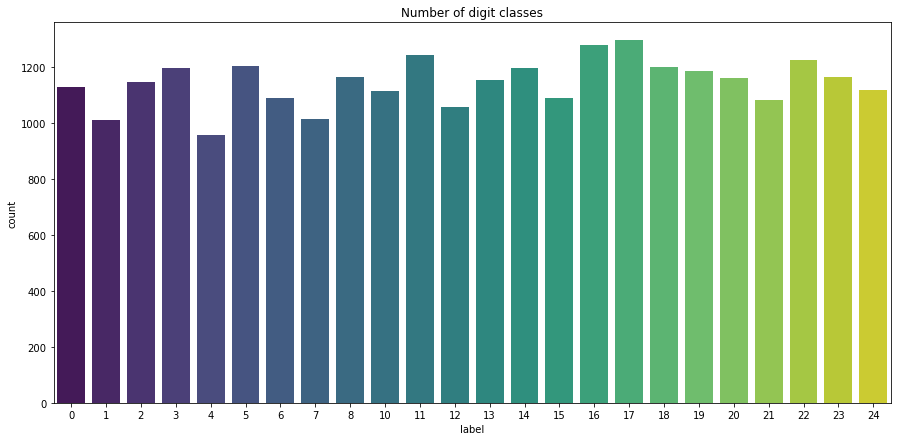

In [ ]:
# visualize number of digits classes
plt.figure(figsize=(15,7))
g = sns.countplot(Y_train, palette="viridis")
plt.title("Number of digit classes")
#Y_train.value_counts()

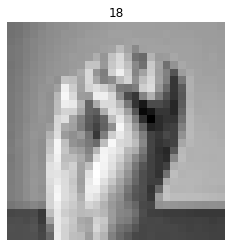

In [ ]:
# plot some samples
img = X_train.iloc[10].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[10,0])
plt.axis("off")
plt.show()

In [ ]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0
print("x_train shape: ",X_train.shape)
print("x_test shape: ",X_test.shape)

x_train shape:  (27455, 784)
x_test shape:  (27455, 784)


In [ ]:
# Reshape
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("x_test shape: ",X_test.shape)

x_train shape:  (27455, 28, 28, 1)
x_test shape:  (27455, 28, 28, 1)


In [ ]:
# Label Encoding 
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
Y_train = to_categorical(Y_train, num_classes = 25)
Y_test = to_categorical(Y_test, num_classes = 25)

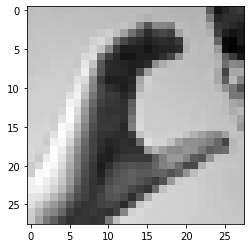

In [ ]:
# Some examples
plt.imshow(X_train[2][:,:,0],cmap='gray')
plt.show()

In [ ]:
model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

# fully connected
model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(25, activation = "softmax"))

In [ ]:
# Define the optimizer
optimizer = adam_v2.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [ ]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0

In [ ]:
epochs = 30  # for better result increase the epochs
batch_size = 128

                       # Data augmentation

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=10,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

                         # Fitting the model

In [ ]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,Y_test),
                             steps_per_epoch=X_train.shape[0] // batch_size)

/Users/fidanqurbanova/.local/lib/python3.8/site-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
214/214 [==============================] - 27s 61ms/step - loss: 3.1003 - accuracy: 0.0845 - val_loss: 1.7040 - val_accuracy: 0.5752
Epoch 2/30
214/214 [==============================] - 13s 59ms/step - loss: 1.8914 - accuracy: 0.4096 - val_loss: 0.7211 - val_accuracy: 0.8291
Epoch 3/30
214/214 [==============================] - 14s 65ms/step - loss: 1.2617 - accuracy: 0.5897 - val_loss: 0.4010 - val_accuracy: 0.9147
Epoch 4/30
214/214 [==============================] - 16s 73ms/step - loss: 0.9638 - accuracy: 0.6775 - val_loss: 0.2877 - val_accuracy: 0.9545
Epoch 5/30
214/214 [==============================] - 20s 91ms/step - loss: 0.8102 - accuracy: 0.7302 - val_loss: 0.1948 - val_accuracy: 0.9669
Epoch 6/30
214/214 [==============================] - 21s 97ms/step - loss: 0.6913 - accuracy: 0.7657 - val_loss: 0.1454 - val_accuracy: 0.9812
Epoch 7/30
214/214 [==============================] - 23s 108ms/step - loss: 0.6031 - accuracy: 0.7945 - val_loss: 0.1244 - val_accuracy

In [ ]:
print("Accuracy of the model is - " , model.evaluate(X_test,Y_test)[1]*100 , "%")

858/858 [==============================] - 5s 5ms/step - loss: 0.0041 - accuracy: 1.0000
Accuracy of the model is -  100.0 %


                   # Final Analysis after Training Model 

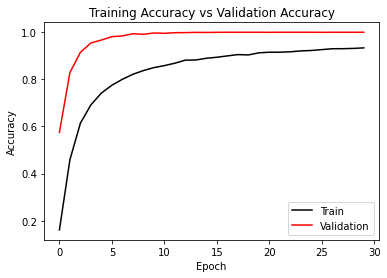

In [ ]:
plt.plot(history.history['accuracy'], color='black',)
plt.plot(history.history['val_accuracy'], color='red',)
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

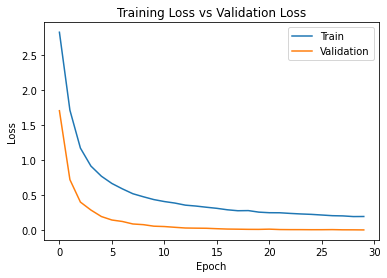

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# Confusion Matrix

# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
confusion_mtx = pd.DataFrame(confusion_mtx , index = [i for i in range(25) if i != 9] , columns = [i for i in range(25) if i != 9])

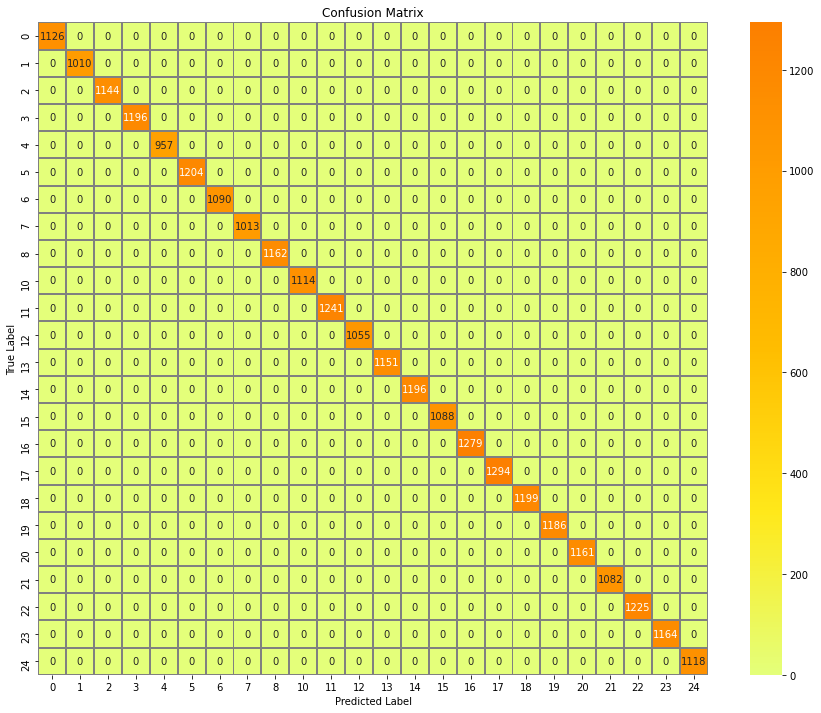

In [ ]:
# plot the confusion matrix
f,ax = plt.subplots(figsize=(15, 12))
sns.heatmap(confusion_mtx, annot=True, linewidths=1,cmap="Wistia",linecolor="gray", fmt= '',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# CONCLUSION

All in all, as it is observed CNN is much more accurate than than SVM or KNN in predicting images from the given test dataset, but besides jumping to deep learning algorithms, the other algorithms are also needed to be considered, since they are much faster, even though most of the time less accurate.